<a href="https://colab.research.google.com/github/pierredumontel/Market_risk_analysis/blob/main/Notebook/Notebook_EOF_Dumontel_Rouet_Yalaoui.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Market risk analysis 

Group : 

|Name | Firstname|
|---|---|
| DUMONTEL | Pierre |
| ROUET | William |
| YALAOUI| Ryan  |

In [ ]:
!pip install yfinance 
!pip install arch 

In [ ]:
!pip install statistics

In [ ]:
from statistics import NormalDist
import pandas as pd 
import numpy as np
import yfinance as yf
from arch import arch_model
import datetime as dt
import sys
import arch.data.sp500
import math
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.graph_objects as go 

# Download data

Financial institutions

In [ ]:
assets = ['WU','GS','WRB']    
start_date = '2007-01-01'
end_date = '2020-12-31'

def download_data():
   stock_data = {}

   for stock in assets:
       ticker = yf.Ticker(stock)
       stock_data[stock] = ticker.history(start=start_date, end=end_date)['Close']
  
   return pd.DataFrame(stock_data)
  
stock_data = download_data()
returns = stock_data.pct_change().dropna()*100
returns.head(3)

,WU,GS,WRB
Date,,,
2007-01-04,0.880654,-0.931636,-1.388807
2007-01-05,-2.531623,0.100600,-1.525857
2007-01-08,-1.657013,2.351157,1.370662


Their benchmark

In [ ]:
benchmarks = ['^NYA']    
start_date = '2007-01-01'
end_date = '2020-12-31'
     
def download_data():
   benchmarks_data = {}

   for stock in benchmarks:
       ticker = yf.Ticker(stock)
       benchmarks_data[stock] = ticker.history(start=start_date, end=end_date)['Close']
  
   return pd.DataFrame(benchmarks_data)
  
benchmarks_data = download_data()
date_bench = benchmarks_data.reset_index()
ret_bench = benchmarks_data.pct_change().dropna()*100
date_rbench = ret_bench.reset_index()
date_rbench = date_rbench[["Date"]]
ret_bench.head(3)

,^NYA
Date,
2007-01-04,-0.218107
2007-01-05,-0.966955
2007-01-08,0.178172


# Visualization of stocks & returns

WRB

In [ ]:
stock = stock_data.reset_index()
sns.set()
data_prt = [go.Scatter(x = stock["Date"],
                         y = stock["WRB"])]

    # Disposition (layout)
layout = dict(
        title='Daily Visualization of WRB stock',
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1,
                         label='1d',
                         step='day',
                         stepmode='backward'),
                    dict(count=6,
                         label='6d',
                         step='day',
                         stepmode='backward'),
                    dict(step='all')
                ])
            ),
            rangeslider=dict(
                visible = True
            ),
            type='date'
        )
)

fig = go.Figure(
        data=data_prt,
        layout=layout)
    
fig.show()

In [ ]:
WRB_GR = ((stock_data["WRB"][3523] - stock_data["WRB"][0]) / stock_data["WRB"][0])*100
WRB_GR

263.57986188964725

In [ ]:
sns.set()
data_prt = [go.Scatter(x = date_rbench["Date"],
                         y = returns["WRB"])]


    # Disposition (layout)
layout = dict(
        title='Daily Visualization of WRB returns',
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1,
                         label='1d',
                         step='day',
                         stepmode='backward'),
                    dict(count=6,
                         label='6d',
                         step='day',
                         stepmode='backward'),
                    dict(step='all')
                ])
            ),
            rangeslider=dict(
                visible = True
            ),
            type='date'
        )
)

   
fig = go.Figure(
        data=data_prt,
        layout=layout)
    
fig.show()

GS

In [ ]:
stock = stock_data.reset_index()
sns.set()
data_prt = [go.Scatter(x = stock["Date"],
                         y = stock["GS"])]

    # Disposition (layout)
layout = dict(
        title='Daily Visualization of GS stock',
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1,
                         label='1d',
                         step='day',
                         stepmode='backward'),
                    dict(count=6,
                         label='6d',
                         step='day',
                         stepmode='backward'),
                    dict(step='all')
                ])
            ),
            rangeslider=dict(
                visible = True
            ),
            type='date'
        )
)

    
fig = go.Figure(
        data=data_prt,
        layout=layout)
    
fig.show()

In [ ]:
GS_GR = ((stock_data["GS"][3523] - stock_data["GS"][0]) / stock_data["GS"][0])*100
GS_GR

56.31385924154456

In [ ]:
sns.set()
data_prt = [go.Scatter(x = date_rbench["Date"],
                         y = returns["GS"])]


    # Disposition (layout)
layout = dict(
        title='Daily Visualization of GS returns',
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1,
                         label='1d',
                         step='day',
                         stepmode='backward'),
                    dict(count=6,
                         label='6d',
                         step='day',
                         stepmode='backward'),
                    dict(step='all')
                ])
            ),
            rangeslider=dict(
                visible = True
            ),
            type='date'
        )
)

   
fig = go.Figure(
        data=data_prt,
        layout=layout)
    
fig.show()

WU

In [ ]:
stock = stock_data.reset_index()
sns.set()
data_prt = [go.Scatter(x = stock["Date"],
                         y = stock["WU"])]

    # Disposition (layout)
layout = dict(
        title='Daily Visualization of WU stock',
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1,
                         label='1d',
                         step='day',
                         stepmode='backward'),
                    dict(count=6,
                         label='6d',
                         step='day',
                         stepmode='backward'),
                    dict(step='all')
                ])
            ),
            rangeslider=dict(
                visible = True
            ),
            type='date'
        )
)

    
fig = go.Figure(
        data=data_prt,
        layout=layout)
    
fig.show()

In [ ]:
WU_GR = ((stock_data["WU"][3523] - stock_data["WU"][0]) / stock_data["WU"][0])*100
WU_GR

34.92667596322471

In [ ]:
sns.set()
data_prt = [go.Scatter(x = date_rbench["Date"],
                         y = returns["WU"])]


    # Disposition (layout)
layout = dict(
        title='Daily Visualization of WU returns',
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1,
                         label='1d',
                         step='day',
                         stepmode='backward'),
                    dict(count=6,
                         label='6d',
                         step='day',
                         stepmode='backward'),
                    dict(step='all')
                ])
            ),
            rangeslider=dict(
                visible = True
            ),
            type='date'
        )
)

    
fig = go.Figure(
        data=data_prt,
        layout=layout)
    
fig.show()

# Time series properties

Correlation of returns to those of their benchmark

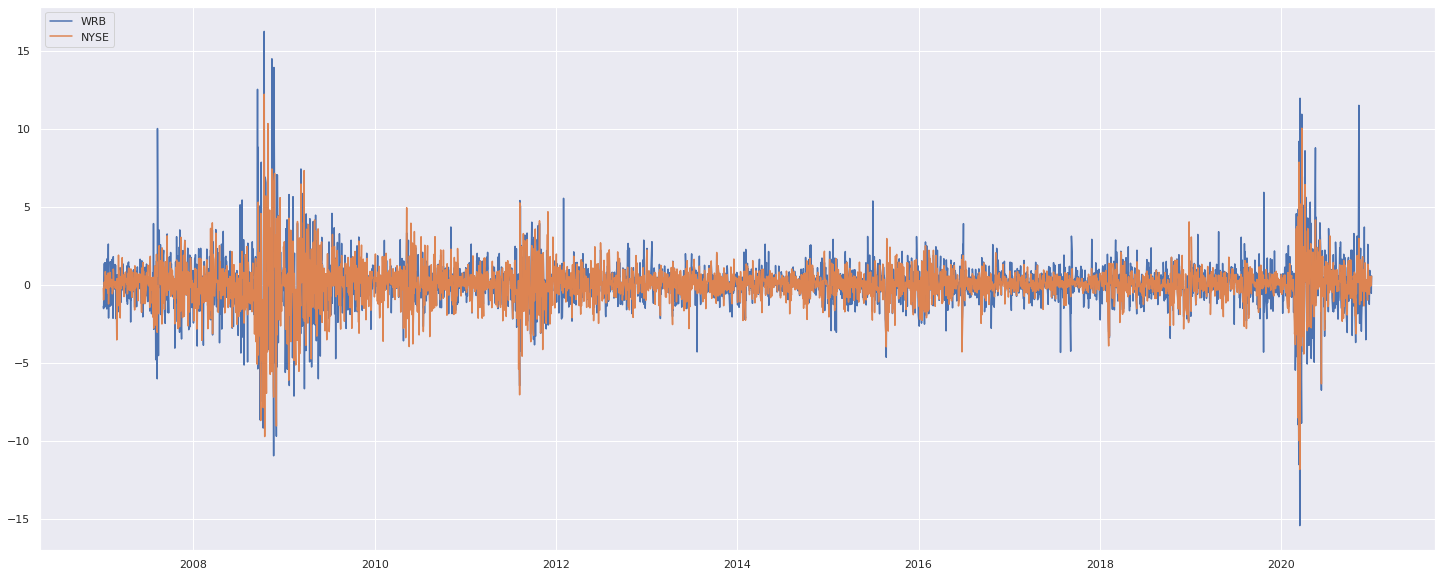

In [ ]:
plt.figure(1, figsize=(25,10))
plt.plot(date_rbench["Date"],returns["WRB"], label="WRB")
plt.plot(date_rbench["Date"],ret_bench['^NYA'], label = "NYSE")
plt.legend(loc="upper left")

In [ ]:
np.corrcoef(returns['WRB'], ret_bench['^NYA'])

array([[1.        , 0.68475963],
       [0.68475963, 1.        ]])

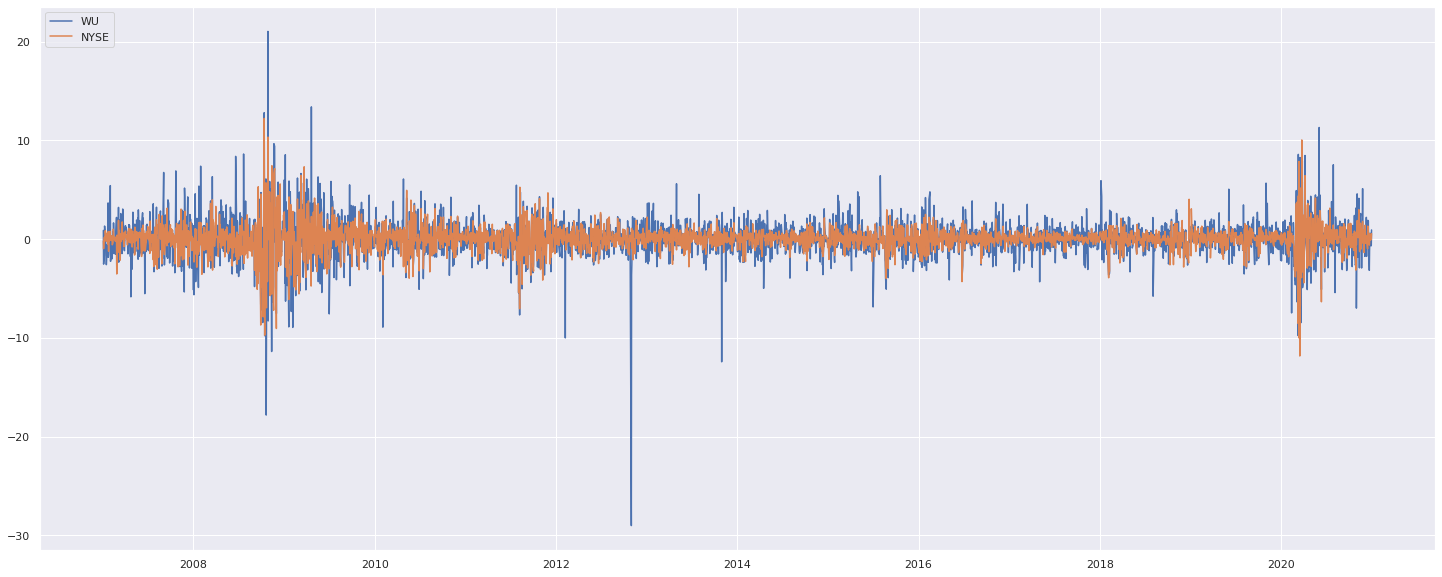

In [ ]:
plt.figure(1, figsize=(25,10))
plt.plot(date_rbench["Date"],returns["WU"], label="WU")
plt.plot(date_rbench["Date"],ret_bench['^NYA'], label = "NYSE")
plt.legend(loc="upper left")

In [ ]:
np.corrcoef(returns['WU'], ret_bench['^NYA'])

array([[1.        , 0.63758585],
       [0.63758585, 1.        ]])

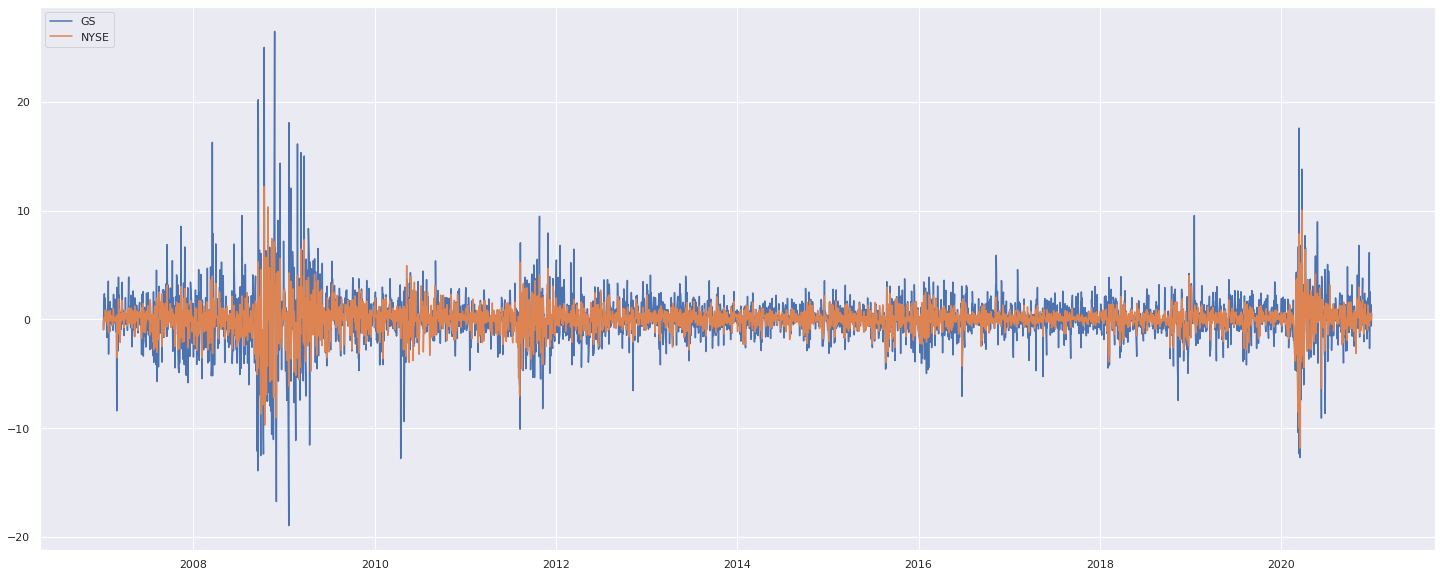

In [ ]:
plt.figure(1, figsize=(25,10))
plt.plot(date_rbench["Date"],returns["GS"], label="GS")
plt.plot(date_rbench["Date"],ret_bench['^NYA'], label = "NYSE")
plt.legend(loc="upper left")

In [ ]:
np.corrcoef(returns['GS'], ret_bench['^NYA'])

array([[1.        , 0.75102914],
       [0.75102914, 1.        ]])

ADF statistic

In [ ]:
from statsmodels.tsa.stattools import adfuller
series = returns["WRB"]
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -11.059035
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [ ]:
series = returns["WU"]
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -13.989122
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [ ]:
series = returns["GS"]
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -14.205714
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


ACF

Text(0.5, 1.0, 'GS')

<Figure size 1800x720 with 0 Axes>

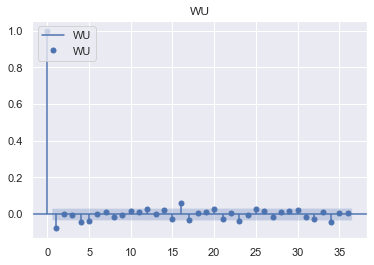

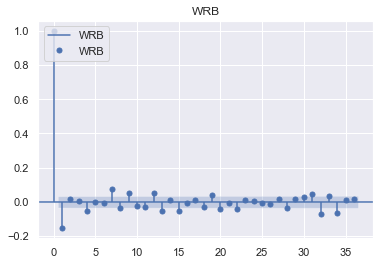

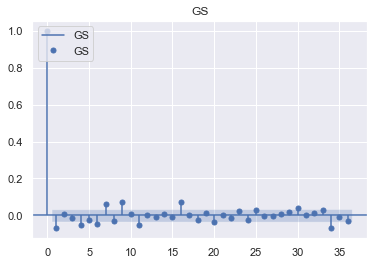

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(1, figsize=(25,10))
plot_acf(returns['WU'], label = "WU")
plt.legend(loc="upper left")
plt.title("WU")
plot_acf(returns["WRB"], label="WRB")
plt.legend(loc="upper left")
plt.title("WRB")
plot_acf(returns['GS'], label = "GS")
plt.legend(loc="upper left")
plt.title("GS")

PACF

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



Text(0.5, 1.0, 'GS')

<Figure size 1800x720 with 0 Axes>

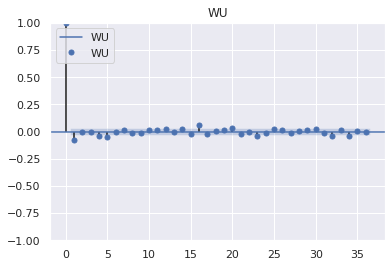

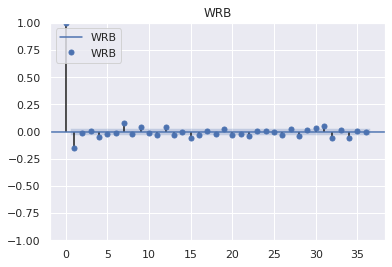

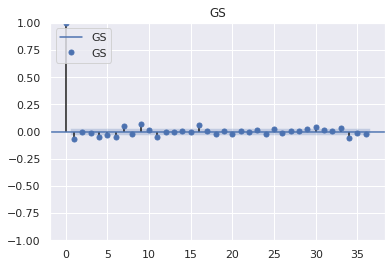

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(1, figsize=(25,10))
plot_pacf(returns['WU'], label = "WU")
plt.legend(loc="upper left")
plt.title("WU")
plot_pacf(returns["WRB"], label="WRB")
plt.legend(loc="upper left")
plt.title("WRB")
plot_pacf(returns['GS'], label = "GS")
plt.legend(loc="upper left")
plt.title("GS")

# VaR computation 

Benchmark

In [ ]:
breturns = ret_bench.reset_index()
# Date 
bdate = pd.DataFrame(breturns[["Date"]])
bdate_fin = bdate[-2500:]
#Returns
brets = breturns[["^NYA"]]
brets_np = brets.to_numpy()
bT_size = np.size(brets_np[:,0])
brtrain = brets_np[-2500:]
brt_size = np.size(brtrain[:,0])

#Dict initialisation 
bsigma2_1 = {}
bVaR_1 = {}
bVaR_2 = {}
bam ={}
bres = {}
bunc_variance = {}
bassets = ["^NYA"]

window = 250
start = 1023
end = 3523

for asset in bassets:
  
  bsigma2_1[asset] = [0]*brt_size 
  bVaR_1[asset] =  [0]*brt_size 
  bVaR_2[asset] = [0]*brt_size 

for t in range(start,end):
    for k in range(0,1):
      bam[asset] = arch_model(brets_np[t-window:t-1,k], mean='Zero', vol='GARCH', p=1,q=1)
      bres[asset] = bam[asset].fit(disp='off',show_warning=False,tol=0.01)

      if t == start:
        bunc_variance[asset] = (bres[asset].params[0] / (1 - bres[asset].params[1] - bres[asset].params[2]))
        bsigma2_1[asset][0] = bres[asset].params[0] + bres[asset].params[1]*(brets_np[t-1,k] - 0)**2 + bres[asset].params[2]*bunc_variance[asset]
      else:
        bsigma2_1[asset][t-start] = bres[asset].params[0] + bres[asset].params[1]*(brets_np[t-1,k] - 0)**2 + bres[asset].params[2]*bsigma2_1[asset][t-start-1]

      bVaR_1[asset][t-start] = 0 + math.sqrt(bsigma2_1[asset][t-start])*NormalDist(mu=0, sigma=1).inv_cdf(0.05) #parametric
      bVaR_2[asset][t-start] = np.quantile(brets_np[t-window:t-1,k], 0.05) #Non parametric

    
for asset in bassets : 
  print("{} : {}".format(asset, bres[asset].params))
  print("{} : {}".format(asset, bunc_variance[asset]))
  print("{} : {}".format(asset, bsigma2_1[asset]))

^NYA : omega       0.095369
alpha[1]    0.197867
beta[1]     0.771682
Name: params, dtype: float64
^NYA : 1.5605123488184731
^NYA : [1.4084674028047675, 1.3113314695529055, 1.186873793093333, 1.3552961302941695, 1.3182938561427908, 1.5392709118791985, 1.396611850048759, 1.2699192217503381, 1.155305865812652, 1.0867133209070319, 1.0193417525010968, 0.95050028361108, 0.8738433694172546, 0.824905840873457, 0.7737439740166048, 0.7211924580458793, 0.7373408551409992, 0.7092998452496335, 0.6592632080939096, 1.0704385405407897, 1.007958393002249, 0.942822356948884, 1.0007893265932628, 0.975393922738599, 1.078864791983879, 1.0089820379365935, 1.1274244694246642, 1.0763848162453689, 1.066736826455716, 1.0300883584911924, 0.9622158132545475, 1.2669946441959072, 1.1965056438086596, 1.141781019185385, 1.16497032033973, 1.309991032974771, 1.4535350426116667, 1.3725546436249367, 1.5144670056160745, 1.4066349354241163, 1.3375527184482021, 1.298948957956237, 1.2346935682227038, 1.1785132020872098, 1.1

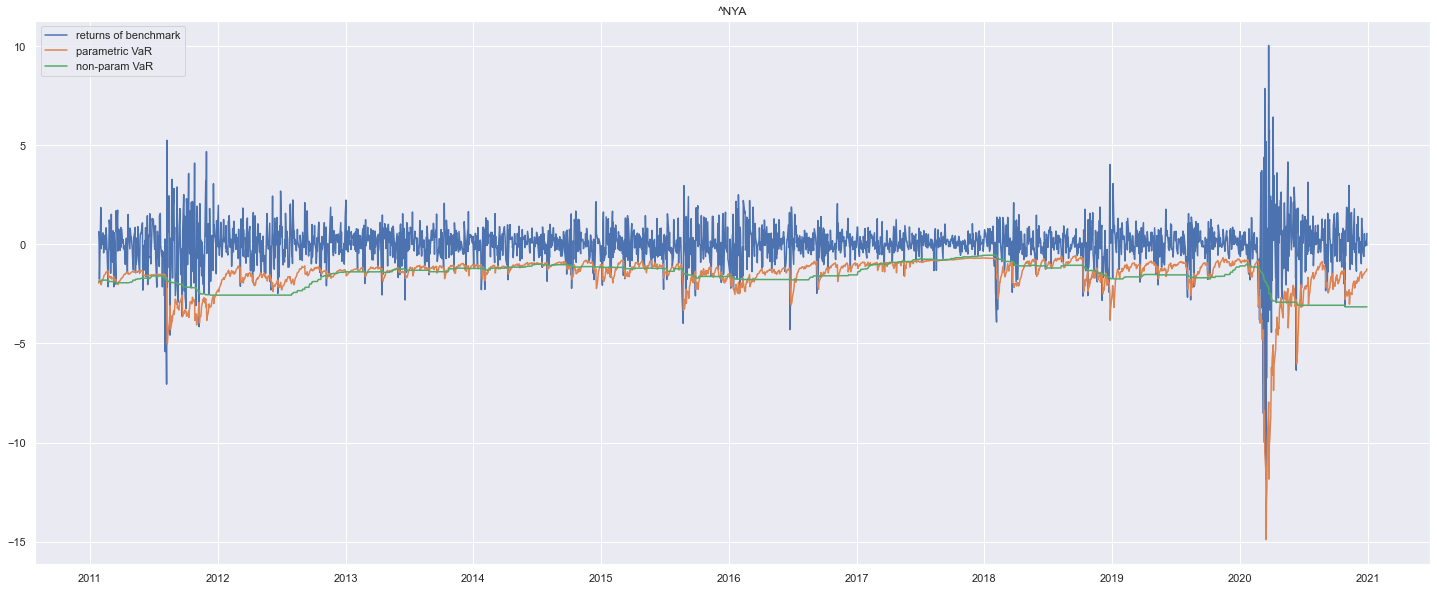

In [ ]:
plt.figure(1024, figsize=(25,10))
plt.plot(bdate_fin,brtrain[:,0], label = "returns of benchmark")
plt.plot(bdate_fin,bVaR_1["^NYA"], label = "parametric VaR")
plt.plot(bdate_fin,bVaR_2["^NYA"], label = "non-param VaR")
plt.legend(loc="upper left")
plt.title("^NYA")
plt.savefig("viz_of_^NYA.png")

Ne lancez la cellule ci dessous qu'une seule fois par utilisation 

In [ ]:
returns = returns.reset_index()

WU

In [ ]:
# Date 
date = pd.DataFrame(returns[["Date"]])
date_fin = date[-2500:]
#Returns
rets = returns[["WU"]]
rets_np = rets.to_numpy()
T_size = np.size(rets_np[:,0])
rtrain = rets_np[-2500:]
rt_size = np.size(rtrain[:,0])

#Dict initialisation
sigma2_1 = {}
VaR_1 = {}
VaR_2 = {}
am ={}
res = {}
unc_variance = {}

assets = ["WU"]
windows = 250
start = 1023
end = 3523
for asset in assets:

    
  sigma2_1[asset] = [0]*rt_size 
  VaR_1[asset] =  [0]*rt_size 
  VaR_2[asset] = [0]*rt_size 

  for t in range(start,end):
      am[asset] = arch_model(rets_np[t-window:t-1], mean='Zero', vol='GARCH', p=1,q=1)
      res[asset] = am[asset].fit(disp='off',show_warning=False,tol=0.01)

      if t == start:
        unc_variance[asset] = (res[asset].params[0] / (1 - res[asset].params[1] - res[asset].params[2]))
        sigma2_1[asset][0] = res[asset].params[0] + res[asset].params[1]*(rets_np[t-1] - 0)**2 + res[asset].params[2]*unc_variance[asset]
      else:
        sigma2_1[asset][t-start] = res[asset].params[0] + res[asset].params[1]*(rets_np[t-1] - 0)**2 + res[asset].params[2]*sigma2_1[asset][t-start-1]
    
      VaR_1[asset][t-start] = 0 + math.sqrt(sigma2_1[asset][t-start])*NormalDist(mu=0, sigma=1).inv_cdf(0.05) #parametric
      VaR_2[asset][t-start] = np.quantile(rets_np[t-window:t-1], 0.05) #Non parametric

for asset in assets : 
  print("{} : {}".format(asset, res[asset].params))
  print("{} : {}".format(asset, unc_variance[asset]))
  print("{} : {}".format(asset, sigma2_1[asset]))

WU : omega       0.122082
alpha[1]    0.094319
beta[1]     0.872647
Name: params, dtype: float64
WU : 4.1002224768676525
WU : [array([3.89603702]), array([3.95407712]), array([3.80860327]), array([4.04266157]), array([4.2031109]), array([3.99342558]), array([4.07687571]), array([3.88457759]), array([3.78732582]), array([3.65533783]), array([3.53132843]), array([3.51674872]), array([3.41321929]), array([3.28557902]), array([3.14347573]), array([3.03351731]), array([2.93567168]), array([2.81306503]), array([2.72577173]), array([2.93774197]), array([2.84211033]), array([2.72693615]), array([3.20257766]), array([3.13660373]), array([3.24530198]), array([3.11943753]), array([3.04846114]), array([2.94548935]), array([2.83274024]), array([2.72519607]), array([2.62672308]), array([2.73846084]), array([2.62555353]), array([2.56927945]), array([2.49632431]), array([2.50363866]), array([2.4398787]), array([2.63923096]), array([2.59479859]), array([2.49368658]), array([2.40299394]), array([2.36671

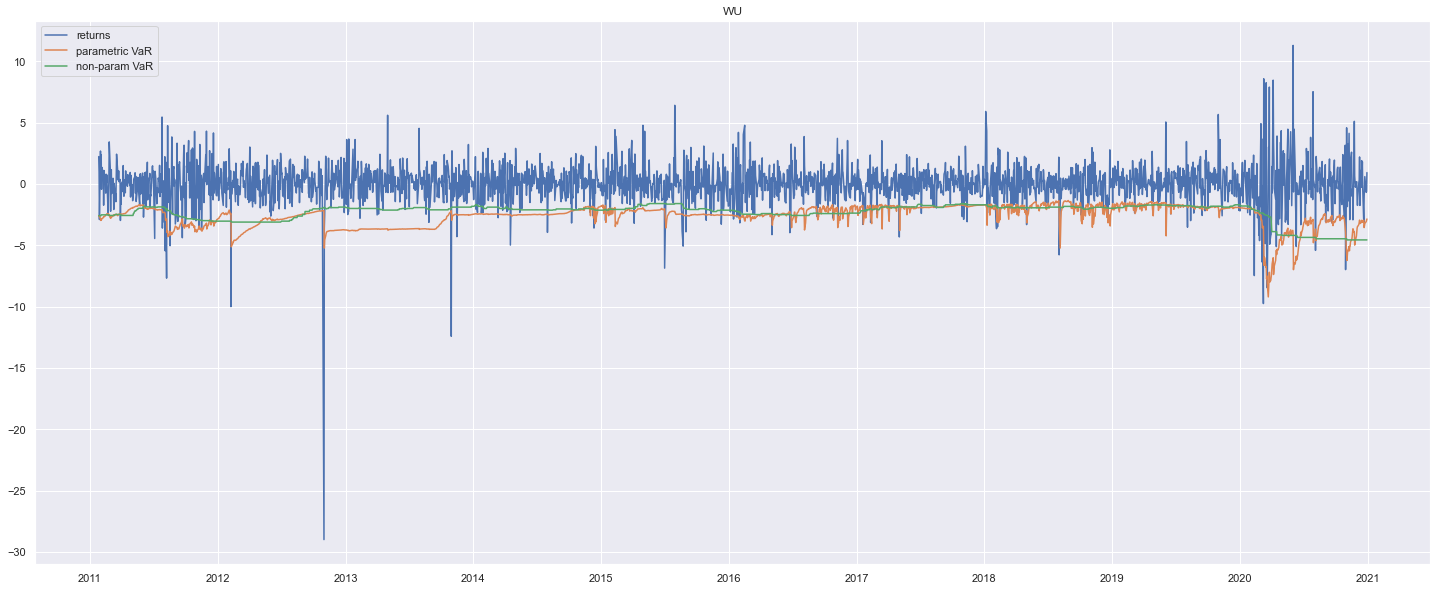

In [ ]:
plt.figure(102, figsize=(25,10))
plt.plot(date_fin,rtrain[:,0], label = "returns")
plt.plot(date_fin,VaR_1["WU"], label = "parametric VaR")
plt.plot(date_fin,VaR_2["WU"], label = "non-param VaR")
plt.legend(loc="upper left")
plt.title("WU")
plt.savefig("viz_of_WU.png")

GS

In [ ]:
# Date 
date = pd.DataFrame(returns[["Date"]])
date_fin = date[-2500:]
#Returns
rets = returns[["GS"]]
rets_np = rets.to_numpy()
T_size = np.size(rets_np)
rtrain = rets_np[-2500:]
rt_size = np.size(rtrain)

#Dict initialisation 
sigma2_1 = {}
VaR_1 = {}
VaR_2 = {}
am ={}
res = {}
unc_variance = {}

assets = ["GS"]
window = 500
start = 1023
end = 3523
for asset in assets:
  
  sigma2_1[asset] = [0]*rt_size 
  VaR_1[asset] =  [0]*rt_size 
  VaR_2[asset] = [0]*rt_size 

  for t in range(start,end):
      am[asset] = arch_model(rets_np[t-window:t-1], mean='Zero', vol='GARCH', p=1,q=1)
      res[asset] = am[asset].fit(disp='off',show_warning=False,tol=0.01)

      if t == start:
        unc_variance[asset] = (res[asset].params[0] / (1 - res[asset].params[1] - res[asset].params[2]))
        sigma2_1[asset][0] = res[asset].params[0] + res[asset].params[1]*(rets_np[t-1] - 0)**2 + res[asset].params[2]*unc_variance[asset]
      else:
        sigma2_1[asset][t-start] = res[asset].params[0] + res[asset].params[1]*(rets_np[t-1] - 0)**2 + res[asset].params[2]*sigma2_1[asset][t-start-1]
    
      VaR_1[asset][t-start] = 0 + math.sqrt(sigma2_1[asset][t-start])*NormalDist(mu=0, sigma=1).inv_cdf(0.05) #parametric
      VaR_2[asset][t-start] = np.quantile(rets_np[t-window:t-1], 0.05) #Non parametric

for asset in assets : 
  print("{} : {}".format(asset, res[asset].params))
  print("{} : {}".format(asset, unc_variance[asset]))
  print("{} : {}".format(asset, sigma2_1[asset]))

GS : omega       0.153149
alpha[1]    0.107740
beta[1]     0.858207
Name: params, dtype: float64
GS : 3.830331221535899
GS : [array([3.92966986]), array([3.80113328]), array([3.7676255]), array([3.70243022]), array([3.63008067]), array([3.55377597]), array([3.46071114]), array([3.37117175]), array([3.28652745]), array([3.26524576]), array([3.21457976]), array([3.19982158]), array([3.12366465]), array([3.06702526]), array([3.00648957]), array([2.94298899]), array([2.87878249]), array([2.84704885]), array([2.80183791]), array([3.0167194]), array([2.95662181]), array([2.90300868]), array([2.87784329]), array([2.83796633]), array([2.84708268]), array([2.78844984]), array([2.83093912]), array([2.93476467]), array([2.89155674]), array([2.87462907]), array([2.79920473]), array([2.78391162]), array([2.70253774]), array([2.71104717]), array([2.65928528]), array([2.71654835]), array([2.64257722]), array([3.25701018]), array([3.02396221]), array([2.84668801]), array([2.74515699]), array([2.603608

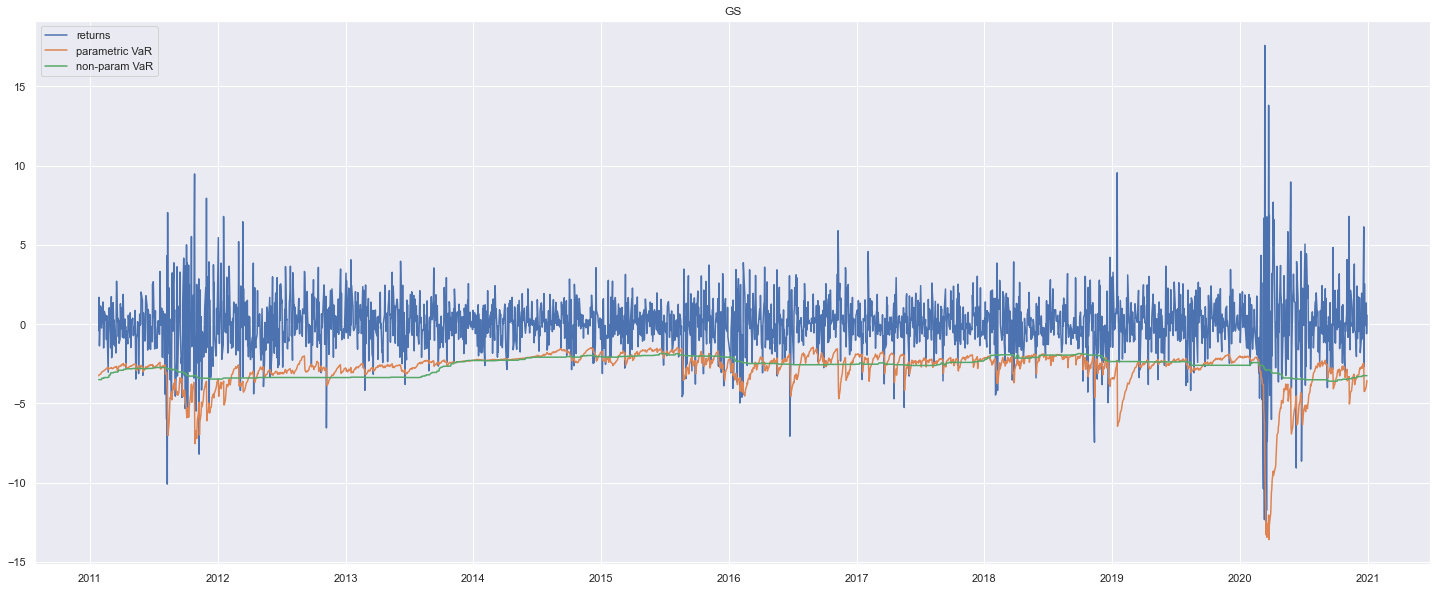

In [ ]:
plt.figure(104, figsize=(25,10))
plt.plot(date_fin,rtrain[:,0], label = "returns")
plt.plot(date_fin,VaR_1["GS"], label = "parametric VaR")
plt.plot(date_fin,VaR_2["GS"], label = "non-param VaR")
plt.legend(loc="upper left")
plt.title("GS")
plt.savefig("viz_of_GS.png")

WRB

In [ ]:
# Date 
date = pd.DataFrame(returns[["Date"]])
date_fin = date[-2500:]
#Returns
rets = returns[["WRB"]]
rets_np = rets.to_numpy()
T_size = np.size(rets_np)
rtrain = rets_np[-2500:]
rt_size = np.size(rtrain)

#Dict initialisation 
sigma2_1 = {}
VaR_1 = {}
VaR_2 = {}
am ={}
res = {}
unc_variance = {}

assets = ["WRB"]
window = 500
start = 1023
end = 3523
for asset in assets:
  
  sigma2_1[asset] = [0]*rt_size 
  VaR_1[asset] =  [0]*rt_size 
  VaR_2[asset] = [0]*rt_size 

  for t in range(start,end):
      am[asset] = arch_model(rets_np[t-window:t-1], mean='Zero', vol='GARCH', p=1,q=1)
      res[asset] = am[asset].fit(disp='off',show_warning=False,tol=0.01)

      if t == start:
        unc_variance[asset] = (res[asset].params[0] / (1 - res[asset].params[1] - res[asset].params[2]))
        sigma2_1[asset][0] = res[asset].params[0] + res[asset].params[1]*(rets_np[t-1] - 0)**2 + res[asset].params[2]*unc_variance[asset]
      else:
        sigma2_1[asset][t-start] = res[asset].params[0] + res[asset].params[1]*(rets_np[t-1] - 0)**2 + res[asset].params[2]*sigma2_1[asset][t-start-1]
    
      VaR_1[asset][t-start] = 0 + math.sqrt(sigma2_1[asset][t-start])*NormalDist(mu=0, sigma=1).inv_cdf(0.05) #parametric
      VaR_2[asset][t-start] = np.quantile(rets_np[t-window:t-1], 0.05) #Non parametric

for asset in assets : 
  print("{} : {}".format(asset, res[asset].params))
  print("{} : {}".format(asset, unc_variance[asset]))
  print("{} : {}".format(asset, sigma2_1[asset]))

WRB : omega       0.073727
alpha[1]    0.183519
beta[1]     0.809533
Name: params, dtype: float64
WRB : 1.371609087017887
WRB : [array([1.70480037]), array([1.60309656]), array([1.52421853]), array([1.69607755]), array([1.52887119]), array([1.66892105]), array([1.50601243]), array([1.37441796]), array([1.27109078]), array([1.15806461]), array([1.07564749]), array([0.99611185]), array([0.92023938]), array([0.85289288]), array([0.83891846]), array([0.79677086]), array([0.98030476]), array([0.99178368]), array([1.31463407]), array([1.28410575]), array([1.26555313]), array([1.29542318]), array([1.47404849]), array([1.33235658]), array([1.28881066]), array([1.21067844]), array([1.33042227]), array([1.35532115]), array([1.25412831]), array([1.34842402]), array([1.43401022]), array([1.54782574]), array([1.63409773]), array([1.48229]), array([1.49799274]), array([1.36646689]), array([1.26991461]), array([1.17869623]), array([1.21690765]), array([1.11727663]), array([1.0594489]), array([1.00667

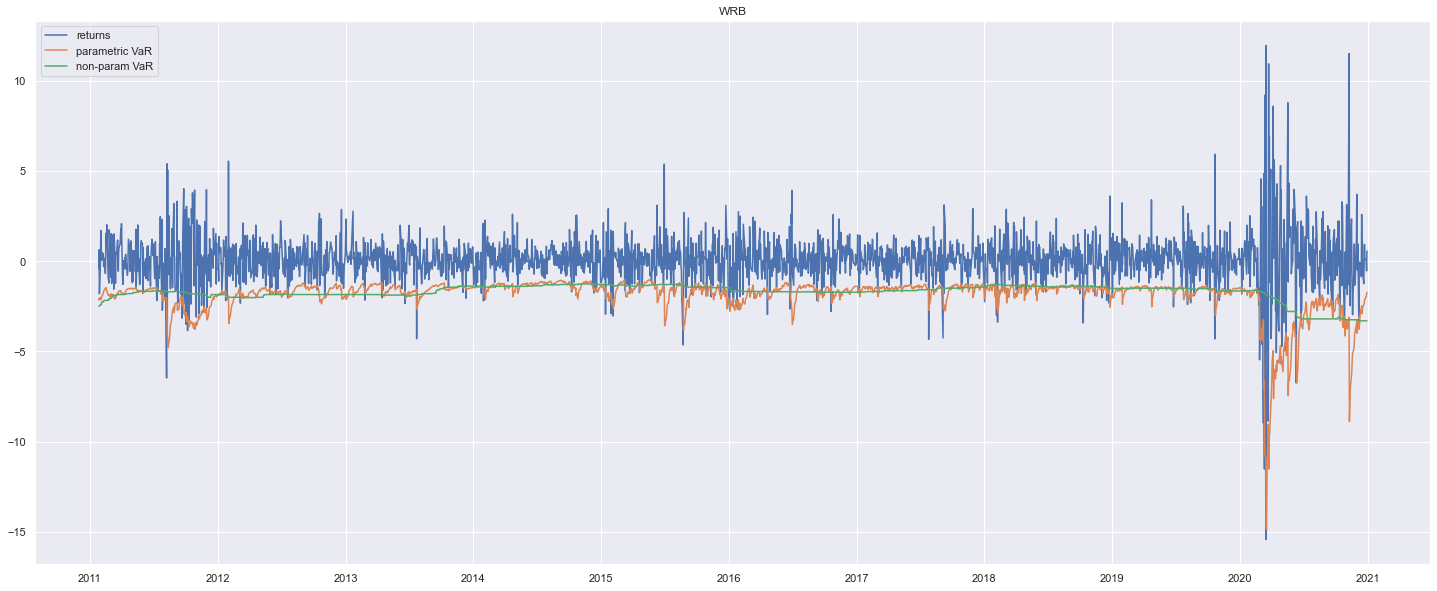

In [ ]:
plt.figure(103, figsize=(25,10))
plt.plot(date_fin,rtrain[:,0], label = "returns")
plt.plot(date_fin,VaR_1["WRB"], label = "parametric VaR")
plt.plot(date_fin,VaR_2["WRB"], label = "non-param VaR")
plt.legend(loc="upper left")
plt.title("WRB")
plt.savefig("viz_of_WRB.png")

# Comparaison

WU

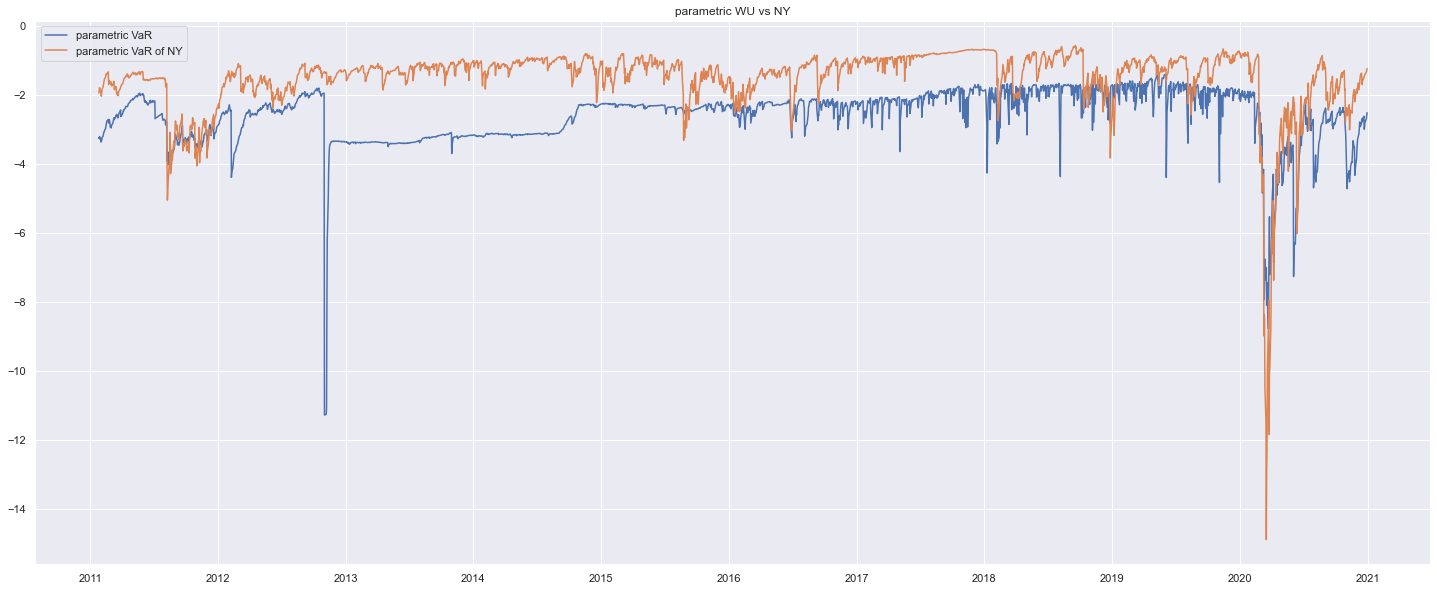

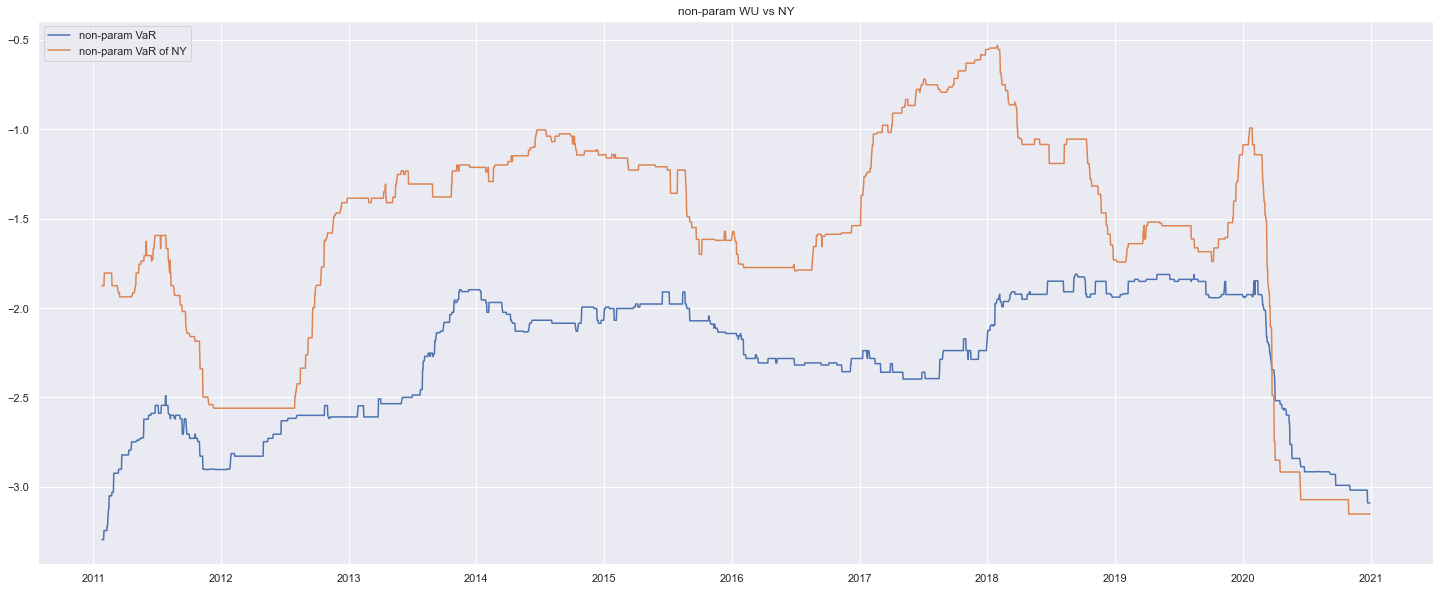

In [ ]:
plt.figure(1003, figsize=(25,10))
plt.plot(date_fin,VaR_1["WU"], label = "parametric VaR")
plt.plot(bdate_fin,bVaR_1["^NYA"], label = "parametric VaR of NY")
plt.legend(loc="upper left")
plt.title("parametric WU vs NY")
plt.savefig("parametric WU vs NY")

plt.figure(1002, figsize=(25,10))
plt.plot(date_fin,VaR_2["WU"], label = "non-param VaR")
plt.plot(bdate_fin,bVaR_2["^NYA"], label = "non-param VaR of NY")
plt.legend(loc="upper left")
plt.title("non-param WU vs NY")
plt.savefig("non-param WU vs NY")

GS

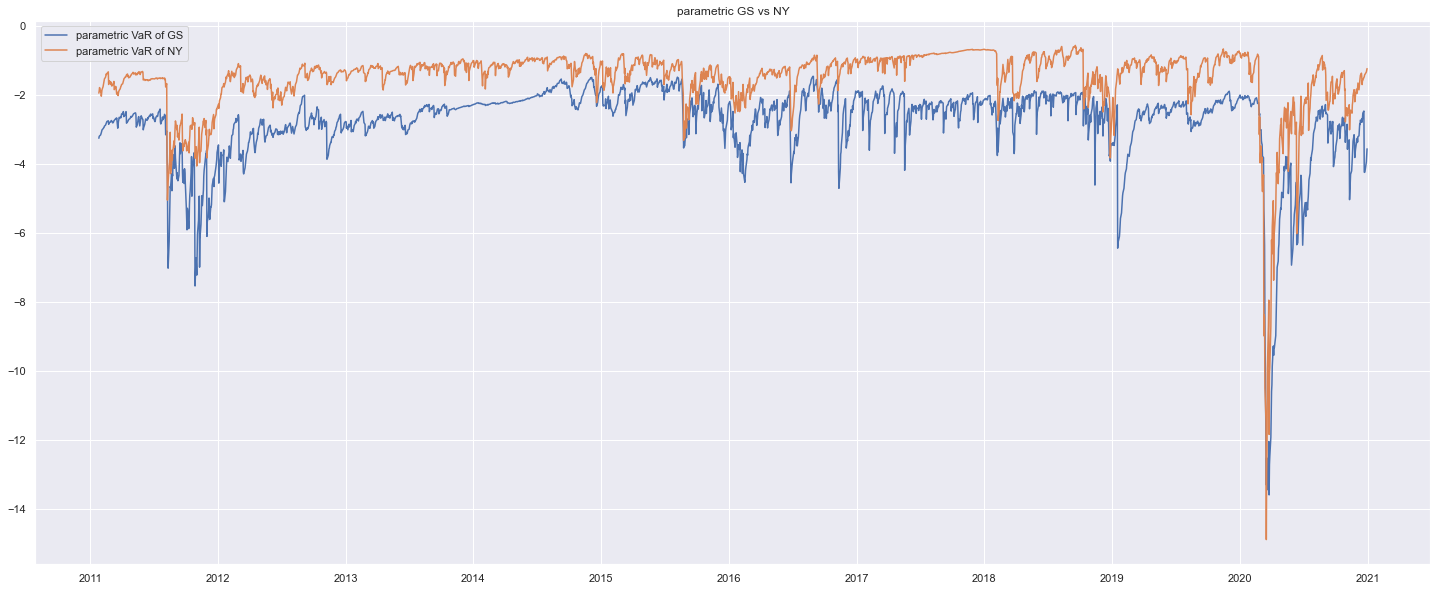

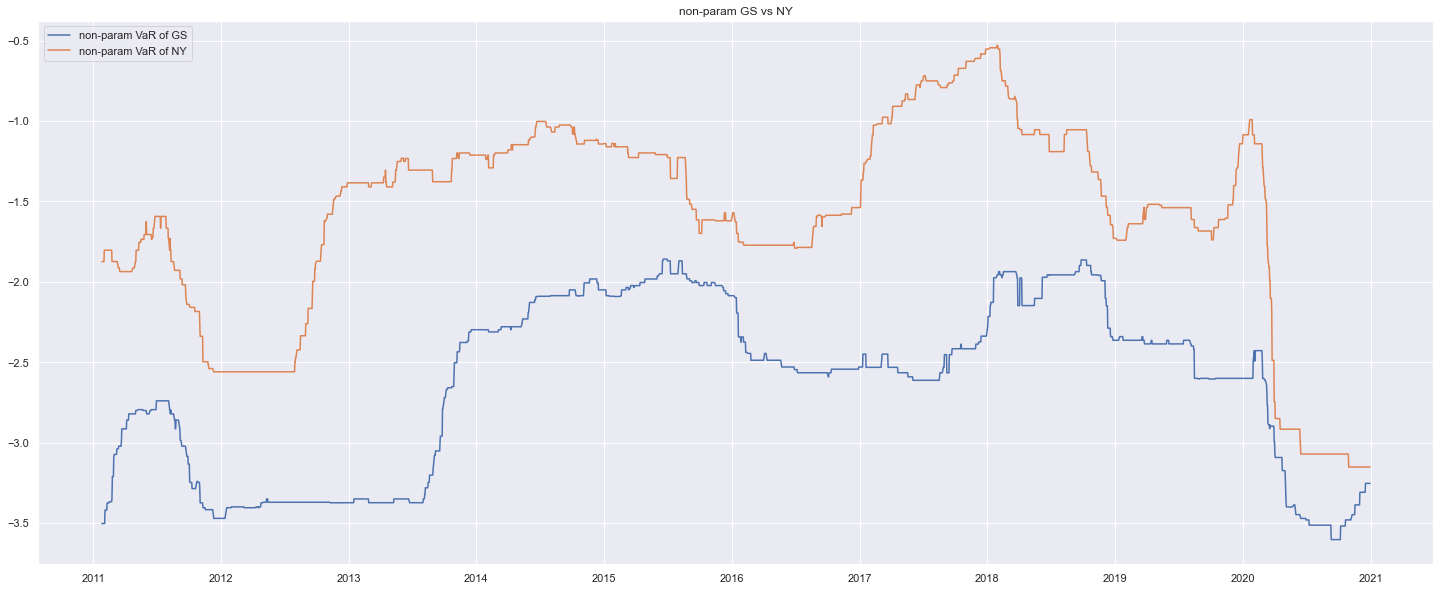

In [ ]:
plt.figure(1003, figsize=(25,10))
plt.plot(date_fin,VaR_1["GS"], label = "parametric VaR of GS")
plt.plot(bdate_fin,bVaR_1["^NYA"], label = "parametric VaR of NY")
plt.legend(loc="upper left")
plt.title("parametric GS vs NY")
plt.savefig("parametric GS vs NY")

plt.figure(1002, figsize=(25,10))
plt.plot(date_fin,VaR_2["GS"], label = "non-param VaR of GS")
plt.plot(bdate_fin,bVaR_2["^NYA"], label = "non-param VaR of NY")
plt.legend(loc="upper left")
plt.title("non-param GS vs NY")
plt.savefig("non-param GS vs NY")

WRB

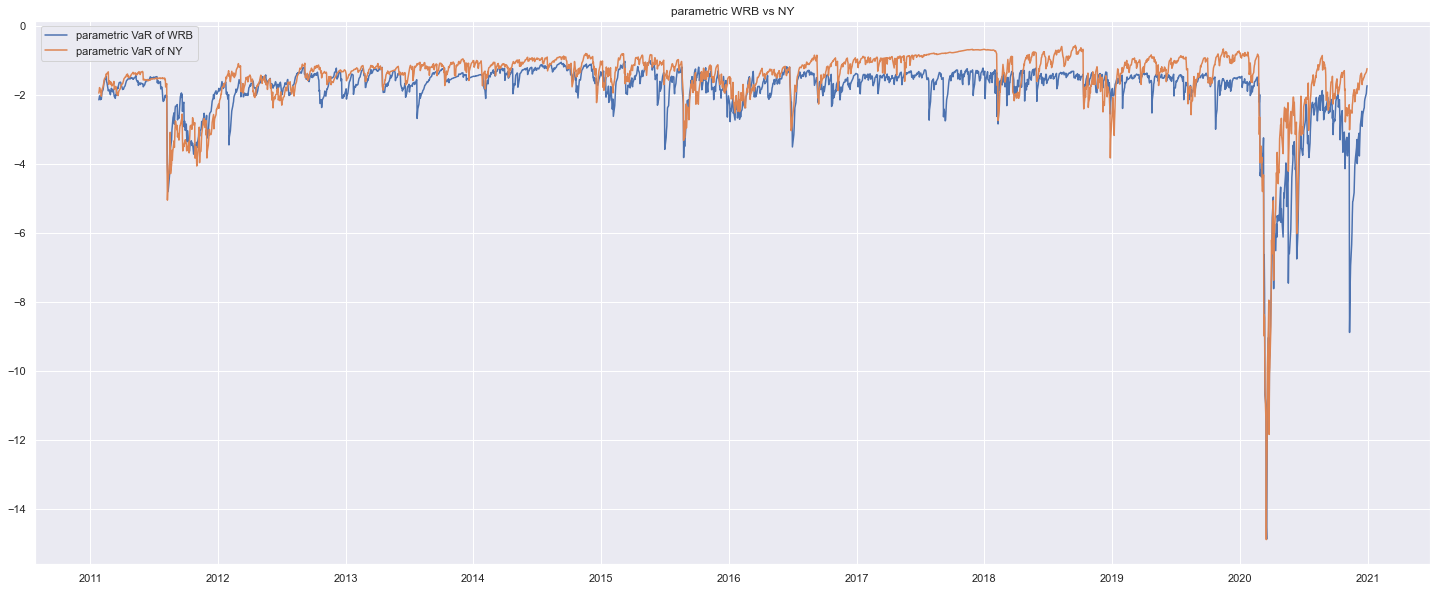

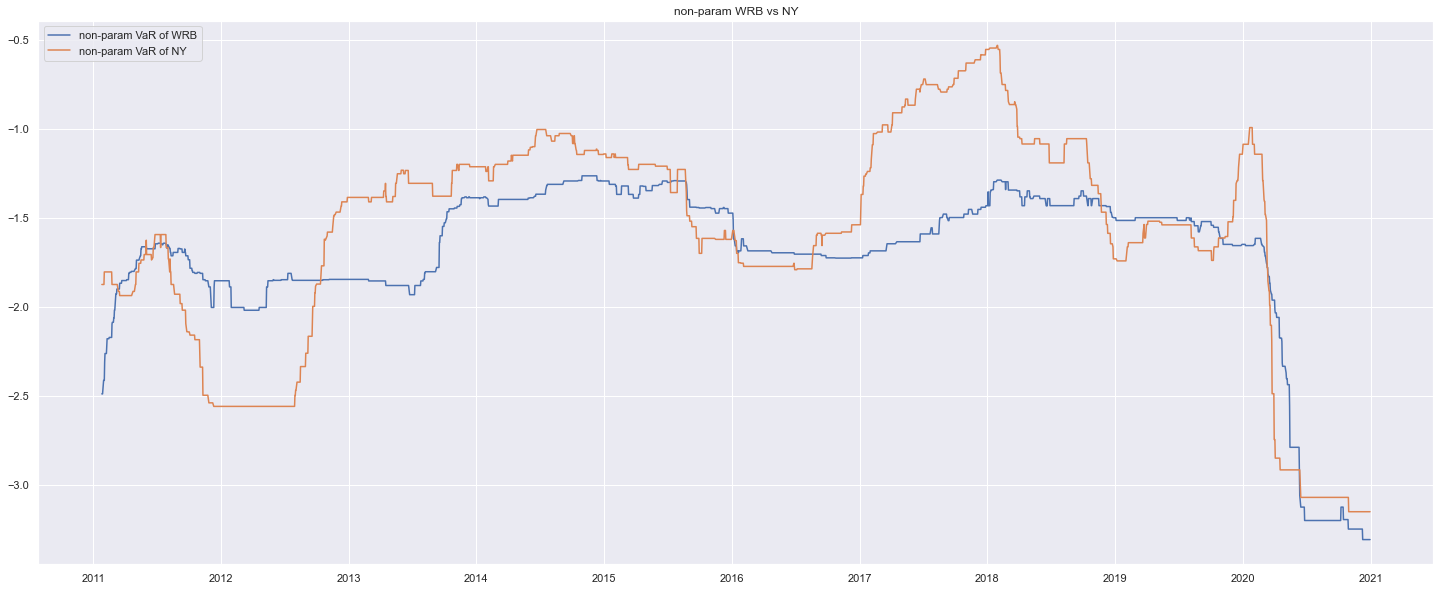

In [ ]:
plt.figure(1003, figsize=(25,10))
plt.plot(date_fin,VaR_1["WRB"], label = "parametric VaR of WRB")
plt.plot(bdate_fin,bVaR_1["^NYA"], label = "parametric VaR of NY")
plt.legend(loc="upper left")
plt.title("parametric WRB vs NY")
plt.savefig("parametric WRB vs NY")

plt.figure(1002, figsize=(25,10))
plt.plot(date_fin,VaR_2["WRB"], label = "non-param VaR of WRB")
plt.plot(bdate_fin,bVaR_2["^NYA"], label = "non-param VaR of NY")
plt.legend(loc="upper left")
plt.title("non-param WRB vs NY")
plt.savefig("non-param WRB vs NY")